In [2]:
# Load Adult Census Dataset Using SHAP 📓

# you load the Adult Census dataset to your notebook instance using the SHAP (SHapley Additive exPlanations) Library, review the dataset, transform it, and upload it to Amazon S3. SHAP is a game theoretic approach to explain the output of any machine learning model

In [3]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [4]:
X.dtypes

Age               float32
Workclass            int8
Education-Num     float32
Marital Status       int8
Occupation           int8
Relationship        int64
Race                 int8
Sex                  int8
Capital Gain      float32
Capital Loss      float32
Hours per week    float32
Country              int8
dtype: object

In [5]:
# Overview the Dataset

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


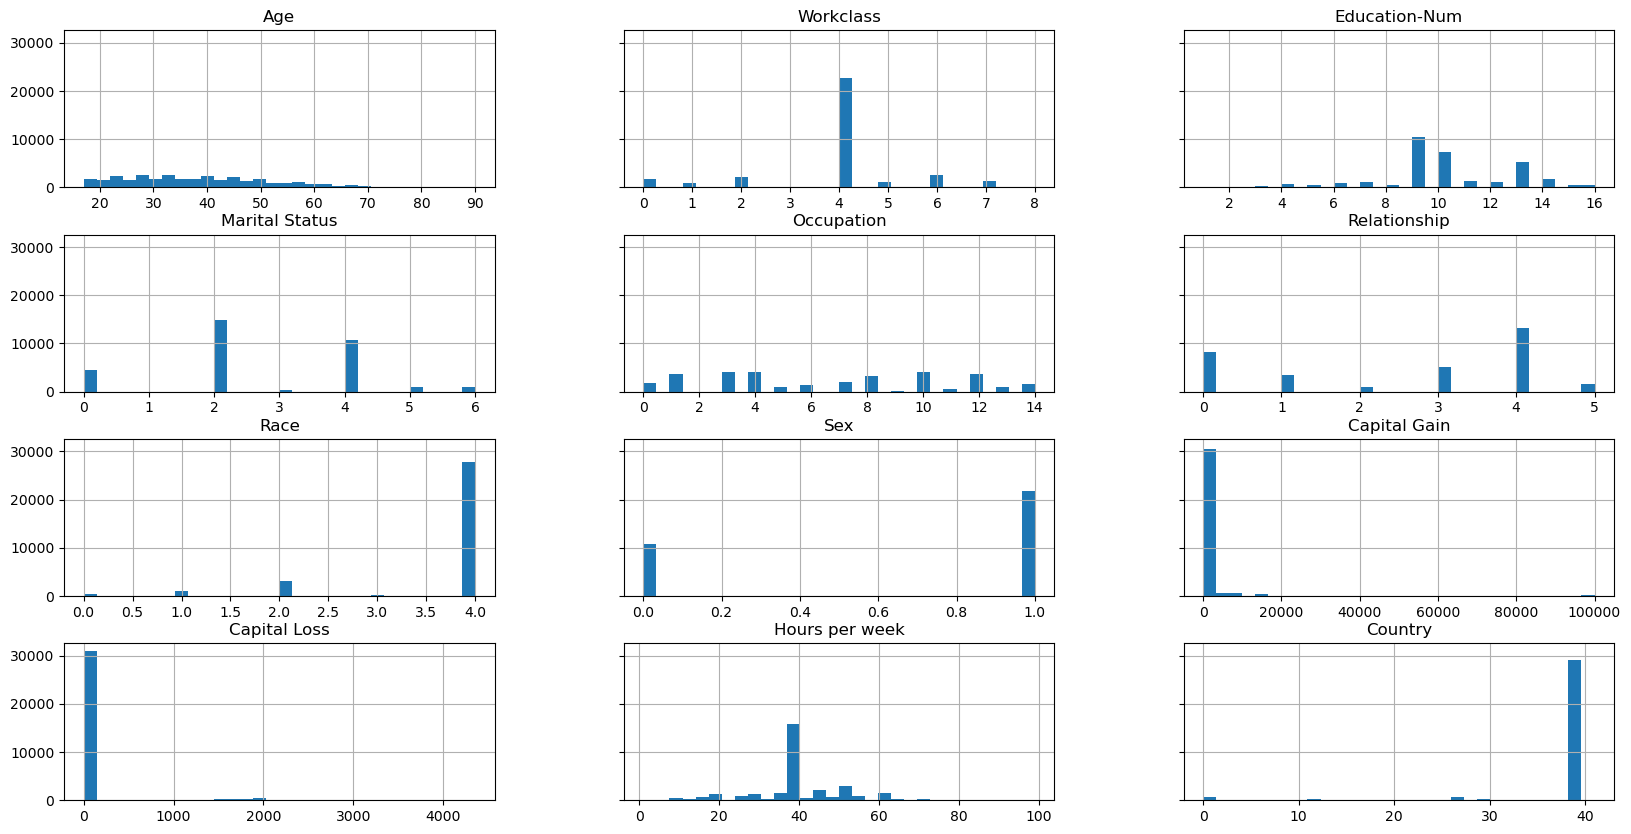

In [6]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

In [8]:
# Using Sklearn, split the dataset into a training set and a test set. 
# The training set is used to train the model, while the test set is used to evaluate the performance of the final trained model. 
# The dataset is randomly sorted with the fixed random seed: 80 percent of the dataset for training set and 20 percent of it for a test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [10]:
# Split the training set to separate out a validation set. 
# The validation set is used to evaluate the performance of the trained model while tuning the model's hyperparameters. 75 percent of the training set becomes the final training set, and the rest is the validation set.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [12]:
# Using the pandas package, explicitly align each dataset by concatenating the numeric features with the true labels.

In [13]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='Income>50K', dtype=int), X_test], axis=1)

In [14]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [15]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [16]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [17]:
# Convert the train and validation dataframe objects to CSV files to match the input file format for the XGBoost algorithm.

In [18]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [19]:
# Upload the Datasets to Amazon S3

# Using the SageMaker AI and Boto3, upload the training and validation datasets to the default Amazon S3 bucket. The datasets in the S3 bucket will be used by a compute-optimized SageMaker instance on Amazon EC2 for training.

In [20]:
!sudo mkdir -p /etc/xdg/sagemaker/
!sudo touch /etc/xdg/sagemaker/config.yaml

In [21]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[01/18/25 23:35:35] INFO     Found credentials from IAM Role:                                   ]8;id=638074;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=14677;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[01/18/25 23:35:40] INFO     Found credentials from IAM Role:                                   ]8;id=269821;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=919483;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[01/18/25 23:35:41] INFO     Created S3 bucket: sagemaker-us-east-2-905417999094                     ]8;id=421328;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=999358;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#723\723]8;;\

                    INFO     Found credentials from IAM Role:                                   ]8;id=401335;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=415508;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=197495;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=519911;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [22]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2025-01-18 23:35:42     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2025-01-18 23:35:43     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


In [23]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

[01/18/25 23:41:00] INFO     Found credentials from IAM Role:                                   ]8;id=996316;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=688427;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

AWS Region: us-east-2


                    INFO     Found credentials from IAM Role:                                   ]8;id=391336;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=39878;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

RoleArn: arn:aws:iam::905417999094:role/AWSSageMaker


In [24]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[
        Rule.sagemaker(rule_configs.create_xgboost_report()),
        ProfilerRule.sagemaker(rule_configs.ProfilerReport())
    ]
)

[01/18/25 23:41:18] INFO     Ignoring unnecessary instance type: None.                            ]8;id=740590;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=763305;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.2-1


                    INFO     Found credentials from IAM Role:                                   ]8;id=268788;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=663218;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=944019;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=544393;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [25]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

In [26]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [27]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

[01/18/25 23:41:46] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=270041;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=272619;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=634743;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=449951;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=299707;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=215651;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Creating training-job with name:                                       ]8;id=493774;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=158383;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-01-18-23-41-46-286                                             

2025-01-18 23:41:50 Starting - Starting the training job...
2025-01-18 23:42:14 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport: InProgress
..
.....01-18 23:42:51 Downloading - Downloading the training image.
.[2025-01-18 23:43:59.683 ip-10-0-149-219.us-east-2.compute.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Single node training.
[2025-01-18 23:43:

In [28]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2025-01-18 23:45:04        314 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
2025-01-18 23:45:04        734 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
2025-01-18 23:45:04       2691 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/FeatureImportance.json
2025-01-18 23:45:04       9599 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json
2025-01-18 23:45:04        180 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-rep

In [29]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-2-905417999094/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json to CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
download: s3://sagemaker-us-east-2-905417999094/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/LossData.json to CreateXgboostReport/xgboost-reports/LossData.json
download: s3://sagemaker-us-east-2-905417999094/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/CreateXgboostReport/xgboost-reports/ResidualDistribution.json to CreateXgboostReport/xgboost-reports/ResidualDistribution.json
download: s3://sagemaker-us-east-2-905417999094/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/rule-output/C

In [30]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [31]:
profiler_report_name = [rule["RuleConfigurationName"] 
                        for rule in xgb_model.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]][0]
profiler_report_name
display("Click link below to view the profiler report", FileLink(profiler_report_name+"/profiler-output/profiler-report.html"))

'Click link below to view the profiler report'

/home/ec2-user/SageMaker/ProfilerReport/profiler-output/profiler-report.html

In [32]:
xgb_model.model_data

's3://sagemaker-us-east-2-905417999094/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-01-18-23-41-46-286/output/model.tar.gz'

In [33]:
 import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

[01/18/25 23:48:33] INFO     Creating model with name: sagemaker-xgboost-2025-01-18-23-48-33-594    ]8;id=643224;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=745432;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[01/18/25 23:48:34] INFO     Creating endpoint-config with name                                     ]8;id=695028;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=960836;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             sagemaker-xgboost-2025-01-18-23-48-33-594                                             

                    INFO     Creating endpoint with name sagemaker-xgboost-2025-01-18-23-48-33-594  ]8;id=223867;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=612611;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----------!

In [34]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2025-01-18-23-48-33-594'

In [35]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

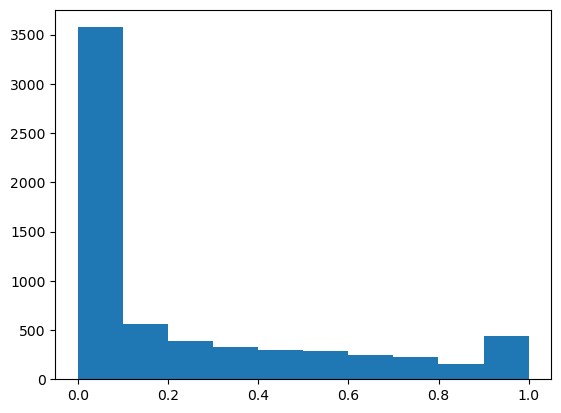

In [36]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [37]:
import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513

